# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants with lower number of dependents
2. Applicants with higher applicant and co-applicant incomes

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [3]:
# Gender, Married, Dependents, Self_Employeed, LoanAmount, Loan_Amount_Term, Credit_History have missing values.

Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [4]:
# Checking counts of applicants with a Credit_History of 1
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [5]:
# Applicant Income median and mean values
print(df['ApplicantIncome'].median())
print(df['ApplicantIncome'].mean())

3812.5
5403.459283387622


In [6]:
# Coapplicant Income median and mean values
print(df['CoapplicantIncome'].median())
print(df['CoapplicantIncome'].mean())

1188.5
1621.245798027101


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [7]:
cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
num_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

df[cat_feats].nunique()

Gender               2
Married              2
Dependents           4
Education            2
Self_Employed        2
Loan_Amount_Term    10
Credit_History       2
Property_Area        3
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [8]:
# Checking frequency of different categories
df[cat_feats].value_counts()

Gender  Married  Dependents  Education     Self_Employed  Loan_Amount_Term  Credit_History  Property_Area
Male    Yes      0           Graduate      No             360.0             1.0             Semiurban        33
                                                                                            Rural            23
        No       0           Graduate      No             360.0             1.0             Urban            20
        Yes      0           Graduate      No             360.0             1.0             Urban            19
        No       0           Graduate      No             360.0             1.0             Semiurban        18
                                                                                                             ..
        Yes      0           Not Graduate  Yes            180.0             0.0             Rural             1
                                           No             480.0             0.0             Urban             

Testing Hypotheses:

<AxesSubplot:>

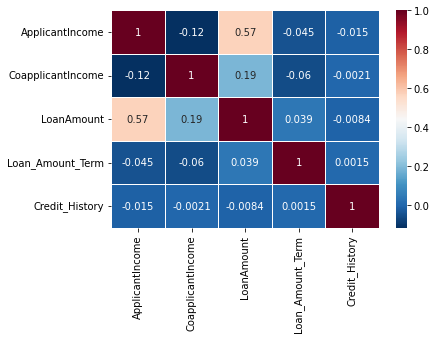

In [9]:
# Correlation Coefficient for Applicant Income
pearsoncorr = df.corr(method = 'pearson')

sb.heatmap(pearsoncorr,
           xticklabels = pearsoncorr.columns,
           yticklabels = pearsoncorr.columns,
           cmap = 'RdBu_r',
           annot = True,
           linewidths = 0.5)

As seen in the heatmap above, applicant income has relatively high correlation to loan amount.

In [10]:
# Correlation for number of dependents
pd.crosstab(df['Loan_Status'], df['Dependents'])

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:>

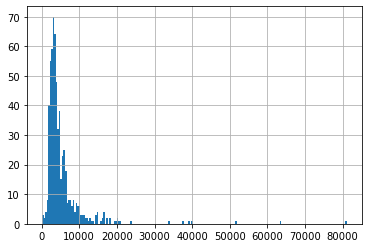

In [11]:
# Histogram of Applicant Income
df['ApplicantIncome'].hist(bins = 200)


Look at box plots to understand the distributions. 

<AxesSubplot:>

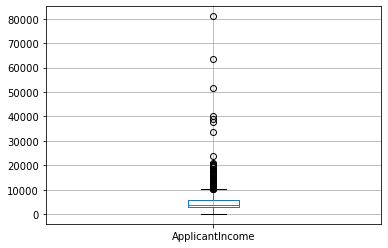

In [12]:
# Boxplot of numerical variables
df.boxplot(column = 'ApplicantIncome')

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

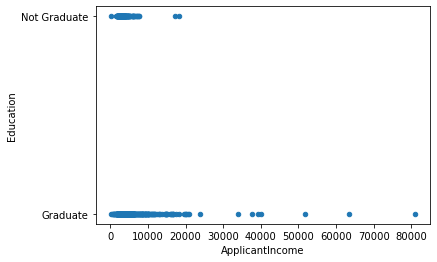

In [13]:
# Plot checking for correlations between education and income
df.plot.scatter(x = 'ApplicantIncome', y = 'Education')

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:>

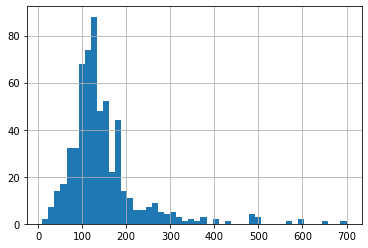

In [14]:
# Histogram of loan amount
df['LoanAmount'].hist(bins = 50)

<AxesSubplot:>

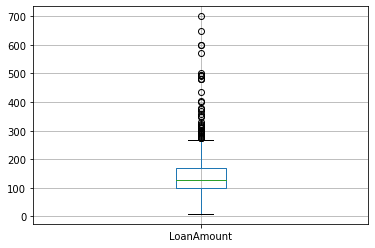

In [15]:
# Boxplot of loan amount
df.boxplot(column = 'LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [16]:
pd.pivot_table(df, columns = cat_feats)

Gender                  Female                                         \
Married                     No                                          
Dependents                   0                                          
Education             Graduate                                          
Self_Employed               No                                          
Loan_Amount_Term         360.0                                          
Credit_History             0.0                       1.0                
Property_Area        Semiurban        Urban        Rural    Semiurban   
ApplicantIncome    3206.833333  3030.000000  4821.000000  4714.000000   
CoapplicantIncome  1796.666667   621.000000   476.000000   189.583333   
LoanAmount          115.666667    83.666667   112.142857   125.833333   

Gender                                                                     \
Married                                                                     
Dependents                                                                  
Education                                                                   
Self_Employed                             Yes                               
Loan_Amount_Term              480.0     300.0     360.0                     
Credit_History                  1.0       1.0       0.0     1.0             
Property_Area         Urban   Rural Semiurban Semiurban   Rural Semiurban   
ApplicantIncome    4071.625  2822.5    2600.0    4583.0  7441.0   15759.0   
CoapplicantIncome   208.250  3112.0    1717.0       0.0     0.0       0.0   
LoanAmount           89.375   132.0      99.0     133.0   194.0      55.0   

Gender             ...     Male                                         \
Married            ...      Yes                                          
Dependents         ...       3+                                          
Education          ... Graduate           Not Graduate                   
Self_Employed      ...      Yes                     No                   
Loan_Amount_Term   ...    360.0                  180.0                   
Credit_History     ...      1.0                    0.0     1.0           
Property_Area      ...    Rural Semiurban        Urban   Rural   Urban   
ApplicantIncome    ...   5677.0    7702.5       2947.0  3522.0  3992.0   
CoapplicantIncome  ...   1424.0     887.0       1664.0     0.0     0.0   
LoanAmount         ...    100.0     223.5         70.0    81.0     NaN   

Gender                                                         
Married                                                        
Dependents                                                     
Education                                                      
Self_Employed                                     Yes          
Loan_Amount_Term    360.0               480.0   60.0    360.0  
Credit_History        1.0                 1.0     1.0     1.0  
Property_Area       Rural Semiurban Semiurban   Urban   Rural  
ApplicantIncome    2871.0    3511.5    2071.0  7100.0  5703.0  
CoapplicantIncome   793.5     491.5     754.0     0.0     0.0  
LoanAmount          143.0      87.0      94.0   125.0   130.0  

[3 rows x 177 columns]

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [17]:
# Gender
df['Gender'].value_counts()
df['Gender'].isnull().sum()
df['Gender'] = df['Gender'].fillna('Male')
df['Gender'].isnull().sum()

0

In [18]:
# Marital Status
df['Married'].value_counts()
df['Married'].isnull().sum()
df['Married'] = df['Married'].fillna('Yes')
df['Married'].isnull().sum()

0

In [19]:
# Number of Dependents
df['Dependents'].value_counts()
df['Dependents'].isnull().sum()
df['Dependents'] = df['Dependents'].fillna(0)
df['Dependents'].isnull().sum()

0

In [20]:
# Employment Type
df['Self_Employed'].value_counts()
df['Self_Employed'].isnull().sum()
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Self_Employed'].isnull().sum()

0

In [21]:
# Loan Amount
df['LoanAmount'].value_counts()
df['LoanAmount'].isnull().sum()
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount'].isnull().sum()

0

In [22]:
# Loan Term
df['Loan_Amount_Term'].value_counts()
df['Loan_Amount_Term'].isnull().sum()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)
df['Loan_Amount_Term'].isnull().sum()

0

In [23]:
# Credit History
df['Credit_History'].value_counts()
df['Credit_History'].isnull().sum()
df['Credit_History'] = df['Credit_History'].fillna(1.0)
df['Credit_History'].isnull().sum()

0

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:>

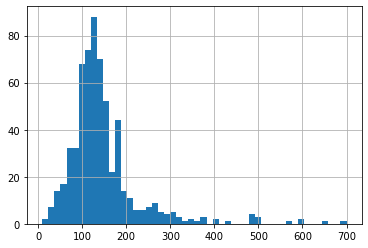

In [24]:
# Histogram of loan amount
df['LoanAmount'].hist(bins = 50)

In [25]:
# Log transformation of loan amount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:>

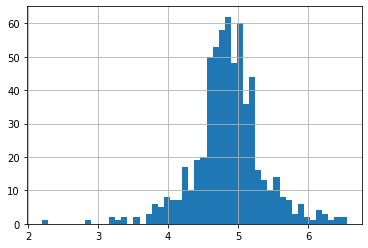

In [26]:
# Histogram of log transformed loan amount
df['LoanAmount_log'].hist(bins = 50)

Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:>

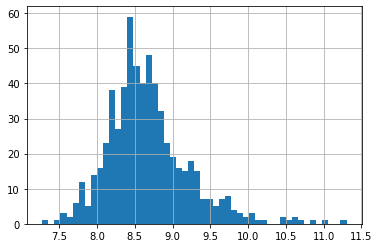

In [27]:
# Combining and log transforming applicant/coapplicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])
df['Total_Income_log'].hist(bins = 50)

In [28]:
# Dropping columns for training set
df_final = df.drop(['Loan_ID', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Total_Income'], axis = 1)
df_final.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.986426,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.948760,8.699515


## 4. Building a Predictive Model

In [47]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Data Preprocessing
categorical_preprocessing = Pipeline([('ohe', OneHotEncoder())])
numerical_preprocessing = Pipeline([('stdscaler', StandardScaler())])

# Applying Transformer 
preprocess = ColumnTransformer([
    ('categorical_preprocessing', categorical_preprocessing, ['Gender', 'Married', 'Education', 'Loan_Amount_Term', 'Self_Employed', 'Property_Area']),
    ('numerical_preprocessing', numerical_preprocessing, ['LoanAmount_log', 'Total_Income_log'])
])

In [36]:
# Feature Selection

# PCA
pca = PCA(n_components = 1)

# Selecting best original features
selection = SelectKBest(k = 1)

In [37]:
# Building transformer from PCA and Univariate selection
combined_features = FeatureUnion([('pca', pca), ('univ_select', selection)])

# Creating object for classification
clf = GradientBoostingClassifier()

In [38]:
# Final Pipeline
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('features', combined_features),
    ('clf', GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100))
])

In [45]:
# Creating Train and Test
X = df_final.drop('Loan_Status', axis = 1)
y = df_final['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

# Fit pipeline to df_final
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_preprocessing',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Loan_Amount_Term',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('numerical_preprocessing',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['LoanAmount_log',
                                                   'Total_Income_log']

Try paramater grid search to improve the results

In [119]:
# Setting up parameter grid
param_grid = {'clf__learning_rate': [0.1, 0.01, 0.001],
              'clf__n_estimators': [100, 200, 300],
              'clf__max_depth': [3, 4, 5],
              'features__pca__n_components': [1, 2, 3],
              'features__univ_select__k': [1, 2, 3]}

# Creating gridsearch object
grid_search = GridSearchCV(pipeline, param_grid, verbose = 10, refit = True)

In [120]:
# Fit model and tune parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 1/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.659 total time=   0.0s
[CV 2/5; 1/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 1/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.634 total time=   0.0s
[CV 3/5; 1/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 1/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, scor

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 2/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.634 total time=   0.0s
[CV 3/5; 2/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 2/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.618 total time=   0.0s
[CV 4/5; 2/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 2/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 5/5; 2/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 2/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 3/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 3/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.667 total time=   0.0s
[CV 2/5; 3/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 3/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.634 total time=   0.0s
[CV 3/5; 3/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 3/243] END clf__learning_rate=

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 4/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.642 total time=   0.0s
[CV 3/5; 4/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 4/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.650 total time=   0.0s
[CV 4/5; 4/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 4/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.667 total time=   0.0s
[CV 5/5; 4/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 4/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 5/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 5/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.618 total time=   0.0s
[CV 2/5; 5/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 5/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.642 total time=   0.0s
[CV 3/5; 5/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 5/243] END clf__learning_rate=

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 6/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.593 total time=   0.0s
[CV 2/5; 6/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 6/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.642 total time=   0.0s
[CV 3/5; 6/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 6/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.650 total time=   0.0s
[CV 4/5; 6/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 6/243] END clf__learning_rat

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 7/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.650 total time=   0.0s
[CV 3/5; 7/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 7/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.634 total time=   0.0s
[CV 4/5; 7/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 7/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.650 total time=   0.0s
[CV 5/5; 7/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 7/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 8/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 8/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.618 total time=   0.0s
[CV 2/5; 8/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 8/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.659 total time=   0.0s
[CV 3/5; 8/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 8/243] END clf__learning_rate=

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 9/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.610 total time=   0.0s
[CV 2/5; 9/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 9/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.659 total time=   0.0s
[CV 3/5; 9/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 9/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 9/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 9/243] END clf__learning_rat

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 10/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.667 total time=   0.0s
[CV 2/5; 10/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 10/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.569 total time=   0.0s
[CV 3/5; 10/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 10/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.553 total time=   0.0s
[CV 4/5; 10/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 10/243] END clf__lear

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 11/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.634 total time=   0.0s
[CV 2/5; 11/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 11/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.626 total time=   0.0s
[CV 3/5; 11/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 11/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.569 total time=   0.0s
[CV 4/5; 11/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 11/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 11/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 12/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 12/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.634 total time=   0.0s
[CV 2/5; 12/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 12/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.626 total time=   0.0s
[CV 3/5; 12/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 12/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 13/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.602 total time=   0.0s
[CV 2/5; 13/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 13/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.634 total time=   0.0s
[CV 3/5; 13/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 13/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.626 total time=   0.0s
[CV 4/5; 13/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 13/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 13/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 14/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 14/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.618 total time=   0.1s
[CV 2/5; 14/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 14/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.610 total time=   0.1s
[CV 3/5; 14/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 14/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 15/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.602 total time=   0.1s
[CV 2/5; 15/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 15/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.1s
[CV 3/5; 15/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 15/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.634 total time=   0.1s
[CV 4/5; 15/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 15/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 15/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 16/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 16/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.634 total time=   0.1s
[CV 2/5; 16/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 16/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.626 total time=   0.1s
[CV 3/5; 16/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 16/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 17/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.618 total time=   0.1s
[CV 2/5; 17/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 17/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.642 total time=   0.1s
[CV 3/5; 17/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 17/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.659 total time=   0.1s
[CV 4/5; 17/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 4/5; 17/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 17/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 18/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 18/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.610 total time=   0.1s
[CV 2/5; 18/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 18/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.642 total time=   0.1s
[CV 3/5; 18/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 18/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 19/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.634 total time=   0.1s
[CV 2/5; 19/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 19/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.537 total time=   0.1s
[CV 3/5; 19/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 19/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.545 total time=   0.1s
[CV 4/5; 19/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 19/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 20/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.642 total time=   0.1s
[CV 2/5; 20/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 20/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.561 total time=   0.1s
[CV 3/5; 20/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 20/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.561 total time=   0.1s
[CV 4/5; 20/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 20/243] END clf__lear

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 21/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.642 total time=   0.1s
[CV 2/5; 21/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 21/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.561 total time=   0.1s
[CV 3/5; 21/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 21/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.569 total time=   0.1s
[CV 4/5; 21/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 21/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 21/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 22/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 22/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.618 total time=   0.1s
[CV 2/5; 22/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 22/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.650 total time=   0.1s
[CV 3/5; 22/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 22/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 22/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 23/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 23/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.602 total time=   0.1s
[CV 2/5; 23/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 23/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.602 total time=   0.1s
[CV 3/5; 23/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 23/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 23/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 24/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 24/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.561 total time=   0.1s
[CV 2/5; 24/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 24/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.1s
[CV 3/5; 24/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 24/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 24/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 25/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 25/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.634 total time=   0.2s
[CV 2/5; 25/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 25/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.659 total time=   0.2s
[CV 3/5; 25/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 25/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 25/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 26/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 26/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.618 total time=   0.2s
[CV 2/5; 26/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 26/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.642 total time=   0.2s
[CV 3/5; 26/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 26/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 26/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 27/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 27/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.593 total time=   0.2s
[CV 2/5; 27/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 27/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.642 total time=   0.1s
[CV 3/5; 27/243] START clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 27/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 27/243] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 28/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 28/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.650 total time=   0.0s
[CV 2/5; 28/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 28/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.610 total time=   0.0s
[CV 3/5; 28/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 28/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 29/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.634 total time=   0.0s
[CV 2/5; 29/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 29/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.650 total time=   0.0s
[CV 3/5; 29/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 29/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.585 total time=   0.0s
[CV 4/5; 29/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 29/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 30/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.650 total time=   0.0s
[CV 3/5; 30/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 30/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.610 total time=   0.0s
[CV 4/5; 30/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 30/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.659 total time=   0.0s
[CV 5/5; 30/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 5/5; 30/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 31/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.642 total time=   0.0s
[CV 3/5; 31/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 31/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 31/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 31/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.699 total time=   0.0s
[CV 5/5; 31/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 5/5; 31/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 32/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.610 total time=   0.0s
[CV 2/5; 32/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 32/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.650 total time=   0.0s
[CV 3/5; 32/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 32/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 4/5; 32/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 32/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 32/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 33/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 33/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.0s
[CV 2/5; 33/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 33/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.650 total time=   0.0s
[CV 3/5; 33/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 33/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 34/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.626 total time=   0.0s
[CV 2/5; 34/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 34/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.650 total time=   0.0s
[CV 3/5; 34/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 34/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 34/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 34/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 34/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 35/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 35/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.626 total time=   0.0s
[CV 2/5; 35/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 35/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.667 total time=   0.0s
[CV 3/5; 35/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 35/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 36/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.602 total time=   0.0s
[CV 2/5; 36/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 36/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.626 total time=   0.0s
[CV 3/5; 36/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 36/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.675 total time=   0.0s
[CV 4/5; 36/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 36/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 36/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 37/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 37/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.659 total time=   0.0s
[CV 2/5; 37/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 37/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.561 total time=   0.1s
[CV 3/5; 37/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 37/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 38/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.634 total time=   0.1s
[CV 2/5; 38/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 38/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.585 total time=   0.1s
[CV 3/5; 38/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 38/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.569 total time=   0.1s
[CV 4/5; 38/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 38/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 39/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.634 total time=   0.1s
[CV 2/5; 39/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 39/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.593 total time=   0.1s
[CV 3/5; 39/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 39/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.577 total time=   0.1s
[CV 4/5; 39/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 39/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 39/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 40/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 40/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.602 total time=   0.1s
[CV 2/5; 40/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 40/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.618 total time=   0.1s
[CV 3/5; 40/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 40/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 41/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.593 total time=   0.1s
[CV 2/5; 41/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 41/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.610 total time=   0.1s
[CV 3/5; 41/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 41/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.642 total time=   0.1s
[CV 4/5; 41/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 41/243] END clf__lear

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 42/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.1s
[CV 2/5; 42/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 42/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.1s
[CV 3/5; 42/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 42/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.618 total time=   0.1s
[CV 4/5; 42/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 42/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 43/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.610 total time=   0.1s
[CV 2/5; 43/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 43/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.642 total time=   0.1s
[CV 3/5; 43/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 43/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.634 total time=   0.1s
[CV 4/5; 43/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 43/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 43/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 44/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 44/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.634 total time=   0.1s
[CV 2/5; 44/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 44/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.626 total time=   0.1s
[CV 3/5; 44/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 44/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 44/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 45/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 45/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.610 total time=   0.1s
[CV 2/5; 45/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 45/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.626 total time=   0.1s
[CV 3/5; 45/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 45/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 45/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 46/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 46/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.642 total time=   0.1s
[CV 2/5; 46/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 46/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.561 total time=   0.1s
[CV 3/5; 46/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 46/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 47/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.642 total time=   0.1s
[CV 2/5; 47/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 47/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.561 total time=   0.2s
[CV 3/5; 47/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 47/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.561 total time=   0.2s
[CV 4/5; 47/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 47/243] END clf__lear

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 47/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 48/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 48/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.650 total time=   0.1s
[CV 2/5; 48/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 48/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.561 total time=   0.2s
[CV 3/5; 48/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 48/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 48/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 49/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 49/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.577 total time=   0.2s
[CV 2/5; 49/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 49/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.2s
[CV 3/5; 49/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 49/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 49/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 50/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 50/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.610 total time=   0.2s
[CV 2/5; 50/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 50/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.602 total time=   0.2s
[CV 3/5; 50/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 50/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 50/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 51/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 51/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.577 total time=   0.2s
[CV 2/5; 51/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 51/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.602 total time=   0.2s
[CV 3/5; 51/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 51/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 51/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 52/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 52/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.618 total time=   0.2s
[CV 2/5; 52/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 52/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.626 total time=   0.2s
[CV 3/5; 52/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 52/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 52/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 53/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 53/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.626 total time=   0.2s
[CV 2/5; 53/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 53/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.626 total time=   0.2s
[CV 3/5; 53/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 53/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 53/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 54/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 54/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.610 total time=   0.2s
[CV 2/5; 54/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 54/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.634 total time=   0.2s
[CV 3/5; 54/243] START clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 54/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 54/243] END clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 55/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 55/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.650 total time=   0.0s
[CV 2/5; 55/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 55/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.585 total time=   0.0s
[CV 3/5; 55/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 55/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 56/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.642 total time=   0.0s
[CV 3/5; 56/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 56/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.553 total time=   0.0s
[CV 4/5; 56/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 56/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.659 total time=   0.0s
[CV 5/5; 56/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 56/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 57/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 57/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.659 total time=   0.0s
[CV 2/5; 57/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 57/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.642 total time=   0.0s
[CV 3/5; 57/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 57/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 58/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.618 total time=   0.0s
[CV 2/5; 58/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 58/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.642 total time=   0.0s
[CV 3/5; 58/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 58/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.593 total time=   0.0s
[CV 4/5; 58/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 58/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 58/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 59/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 59/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.593 total time=   0.0s
[CV 2/5; 59/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 59/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.642 total time=   0.0s
[CV 3/5; 59/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 59/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 60/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.0s
[CV 2/5; 60/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 60/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.659 total time=   0.0s
[CV 3/5; 60/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 60/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.0s
[CV 4/5; 60/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 60/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 60/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 61/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 61/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.626 total time=   0.0s
[CV 2/5; 61/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 61/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.659 total time=   0.0s
[CV 3/5; 61/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 61/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 62/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.618 total time=   0.1s
[CV 2/5; 62/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 62/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.650 total time=   0.1s
[CV 3/5; 62/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 62/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.650 total time=   0.1s
[CV 4/5; 62/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 4/5; 62/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 62/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 63/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 63/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.618 total time=   0.0s
[CV 2/5; 63/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 63/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.650 total time=   0.0s
[CV 3/5; 63/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 63/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 64/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.642 total time=   0.1s
[CV 2/5; 64/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 64/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.537 total time=   0.1s
[CV 3/5; 64/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 64/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.561 total time=   0.1s
[CV 4/5; 64/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 64/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 65/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.626 total time=   0.1s
[CV 2/5; 65/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 65/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.569 total time=   0.1s
[CV 3/5; 65/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 65/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.537 total time=   0.1s
[CV 4/5; 65/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 65/243] END clf__lear

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 65/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 66/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 66/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.634 total time=   0.1s
[CV 2/5; 66/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 66/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.602 total time=   0.1s
[CV 3/5; 66/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 66/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 67/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.626 total time=   0.1s
[CV 2/5; 67/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 67/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.642 total time=   0.1s
[CV 3/5; 67/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 67/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.569 total time=   0.1s
[CV 4/5; 67/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 67/243] END clf__learn

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 67/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 68/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 68/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.610 total time=   0.2s
[CV 2/5; 68/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 68/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.634 total time=   0.1s
[CV 3/5; 68/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 68/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 68/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 69/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 69/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.610 total time=   0.2s
[CV 2/5; 69/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 69/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.618 total time=   0.2s
[CV 3/5; 69/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 69/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 69/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 70/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 70/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.618 total time=   0.2s
[CV 2/5; 70/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 70/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.642 total time=   0.2s
[CV 3/5; 70/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 70/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 70/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 71/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 71/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.618 total time=   0.2s
[CV 2/5; 71/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 71/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.642 total time=   0.2s
[CV 3/5; 71/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 71/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 71/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 72/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 72/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.618 total time=   0.2s
[CV 2/5; 72/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 72/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.642 total time=   0.2s
[CV 3/5; 72/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 72/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 72/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 73/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 73/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.634 total time=   0.2s
[CV 2/5; 73/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 73/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.553 total time=   0.2s
[CV 3/5; 73/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 73/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 73/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 74/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 74/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.634 total time=   0.2s
[CV 2/5; 74/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 74/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.593 total time=   0.2s
[CV 3/5; 74/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 74/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 74/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 75/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 75/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.618 total time=   0.2s
[CV 2/5; 75/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 75/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.569 total time=   0.2s
[CV 3/5; 75/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 75/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 75/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 76/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 76/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.618 total time=   0.2s
[CV 2/5; 76/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 76/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.602 total time=   0.3s
[CV 3/5; 76/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 76/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 76/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.3s
[CV 1/5; 77/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 77/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.610 total time=   0.2s
[CV 2/5; 77/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 77/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.626 total time=   0.3s
[CV 3/5; 77/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 77/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 77/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.3s
[CV 1/5; 78/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 78/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.626 total time=   0.3s
[CV 2/5; 78/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 78/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.602 total time=   0.3s
[CV 3/5; 78/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 78/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 78/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 79/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 79/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.650 total time=   0.3s
[CV 2/5; 79/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 79/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.659 total time=   0.3s
[CV 3/5; 79/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 79/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 79/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.3s
[CV 1/5; 80/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 80/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.618 total time=   0.3s
[CV 2/5; 80/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 80/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.626 total time=   0.3s
[CV 3/5; 80/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 80/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 80/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.3s
[CV 1/5; 81/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 81/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.634 total time=   0.3s
[CV 2/5; 81/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 81/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.634 total time=   0.3s
[CV 3/5; 81/243] START clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 81/243] END clf__learnin

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 81/243] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.3s
[CV 1/5; 82/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 82/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 2/5; 82/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 82/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.675 total time=   0.0s
[CV 3/5; 82/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 82/243] END clf__le

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 83/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 3/5; 83/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 83/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 83/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 83/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 5/5; 83/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 83/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 84/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 84/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.675 total time=   0.0s
[CV 2/5; 84/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 84/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 3/5; 84/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 84/243] END clf__l

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 85/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 85/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 85/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 85/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 85/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 85/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 85/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 86/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 86/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 86/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 86/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 86/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 5/5; 86/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 86/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 87/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 87/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 2/5; 87/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 87/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 87/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 87/243] END clf__l

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 88/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 88/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 88/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.707 total time=   0.0s
[CV 3/5; 88/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 88/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 4/5; 88/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 88/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 89/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 89/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 89/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.707 total time=   0.0s
[CV 3/5; 89/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 89/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 4/5; 89/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 4/5; 89/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 90/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 90/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 90/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.707 total time=   0.0s
[CV 3/5; 90/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 90/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 4/5; 90/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 90/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 91/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 2/5; 91/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 91/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.675 total time=   0.0s
[CV 3/5; 91/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 91/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.675 total time=   0.0s
[CV 4/5; 91/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 91/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 91/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 92/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 92/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.675 total time=   0.0s
[CV 2/5; 92/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 92/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.667 total time=   0.0s
[CV 3/5; 92/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 92/243] END clf__l

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 93/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.675 total time=   0.0s
[CV 2/5; 93/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 93/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.667 total time=   0.0s
[CV 3/5; 93/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 93/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 93/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 93/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 93/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 94/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 94/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.699 total time=   0.0s
[CV 2/5; 94/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 94/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.707 total time=   0.1s
[CV 3/5; 94/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 94/243] END clf__l

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 95/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 95/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 95/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.675 total time=   0.0s
[CV 3/5; 95/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 95/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 4/5; 95/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 95/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 95/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 96/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 96/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 2/5; 96/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 96/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.675 total time=   0.0s
[CV 3/5; 96/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 96/243] END clf__l

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 97/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 2/5; 97/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 97/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.707 total time=   0.1s
[CV 3/5; 97/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 97/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.707 total time=   0.1s
[CV 4/5; 97/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 97/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 97/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 98/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 98/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 2/5; 98/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 98/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.707 total time=   0.1s
[CV 3/5; 98/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 98/243] END clf__l

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 99/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 2/5; 99/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 99/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.707 total time=   0.1s
[CV 3/5; 99/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 99/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.707 total time=   0.1s
[CV 4/5; 99/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 99/243] END clf_

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 99/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 100/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 100/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.659 total time=   0.1s
[CV 2/5; 100/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 100/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.650 total time=   0.1s
[CV 3/5; 100/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 100/243] END 

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 101/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.650 total time=   0.1s
[CV 2/5; 101/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 101/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.642 total time=   0.1s
[CV 3/5; 101/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 101/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 4/5; 101/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 101/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 102/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.675 total time=   0.1s
[CV 2/5; 102/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 102/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.642 total time=   0.1s
[CV 3/5; 102/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 102/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 4/5; 102/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 102/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 103/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.675 total time=   0.1s
[CV 2/5; 103/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 103/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.699 total time=   0.1s
[CV 3/5; 103/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 103/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 4/5; 103/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 103/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 103/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 104/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 104/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.675 total time=   0.1s
[CV 2/5; 104/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 104/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 3/5; 104/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 104/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 104/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 105/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 105/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.667 total time=   0.1s
[CV 2/5; 105/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 105/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 3/5; 105/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 105/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 105/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 106/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 106/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 2/5; 106/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 106/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.675 total time=   0.1s
[CV 3/5; 106/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 106/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 106/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 107/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 107/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 107/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 107/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.675 total time=   0.1s
[CV 3/5; 107/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 107/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 107/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 108/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 108/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.2s
[CV 2/5; 108/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 108/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.675 total time=   0.1s
[CV 3/5; 108/243] START clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 108/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 108/243] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 109/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 109/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 2/5; 109/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 109/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.667 total time=   0.0s
[CV 3/5; 109/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 109/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 110/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.675 total time=   0.0s
[CV 2/5; 110/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 110/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 3/5; 110/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 110/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 110/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 110/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 111/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 3/5; 111/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 111/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 111/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 111/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 5/5; 111/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 111/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 112/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 112/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.675 total time=   0.0s
[CV 2/5; 112/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 112/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 112/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 112/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 112/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 113/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 113/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.675 total time=   0.0s
[CV 2/5; 113/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 113/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 113/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 113/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 113/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 114/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 114/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 2/5; 114/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 114/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 114/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 114/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 114/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 115/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 115/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 115/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 115/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.707 total time=   0.0s
[CV 3/5; 115/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 115/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 116/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.699 total time=   0.0s
[CV 2/5; 116/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 116/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.707 total time=   0.0s
[CV 3/5; 116/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 116/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.699 total time=   0.0s
[CV 4/5; 116/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 4/5; 116/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 116/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 117/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 117/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.699 total time=   0.0s
[CV 2/5; 117/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 117/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.707 total time=   0.0s
[CV 3/5; 117/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 117/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 118/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.675 total time=   0.1s
[CV 2/5; 118/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 118/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 118/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 118/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.675 total time=   0.1s
[CV 4/5; 118/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 118/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 118/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 119/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 119/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.675 total time=   0.1s
[CV 2/5; 119/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 119/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 3/5; 119/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 119/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 120/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.675 total time=   0.1s
[CV 2/5; 120/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 120/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 3/5; 120/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 120/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 4/5; 120/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 120/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 120/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 121/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 121/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.675 total time=   0.1s
[CV 2/5; 121/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 121/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 121/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 121/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 122/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 2/5; 122/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 122/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 122/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 122/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.707 total time=   0.1s
[CV 4/5; 122/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 122/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 123/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.667 total time=   0.1s
[CV 2/5; 123/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 123/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 123/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 123/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.707 total time=   0.1s
[CV 4/5; 123/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 123/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 124/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.642 total time=   0.1s
[CV 2/5; 124/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 124/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 124/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 124/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.707 total time=   0.1s
[CV 4/5; 124/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 124/243] 

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 124/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 125/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 125/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.667 total time=   0.1s
[CV 2/5; 125/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 125/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 125/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 125/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 125/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 126/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 126/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.667 total time=   0.1s
[CV 2/5; 126/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 126/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 3/5; 126/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 126/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 126/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 127/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 127/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.650 total time=   0.1s
[CV 2/5; 127/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 127/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.667 total time=   0.1s
[CV 3/5; 127/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 127/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 127/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 128/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 128/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.650 total time=   0.1s
[CV 2/5; 128/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 128/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.650 total time=   0.1s
[CV 3/5; 128/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 128/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 128/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 129/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 129/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.667 total time=   0.2s
[CV 2/5; 129/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 129/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.650 total time=   0.2s
[CV 3/5; 129/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 129/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 129/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 130/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 130/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.667 total time=   0.2s
[CV 2/5; 130/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 130/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 130/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 130/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 130/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 131/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 131/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.675 total time=   0.2s
[CV 2/5; 131/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 131/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.2s
[CV 3/5; 131/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 131/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 131/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 132/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 132/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.667 total time=   0.2s
[CV 2/5; 132/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 132/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.2s
[CV 3/5; 132/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 132/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 132/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 133/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 133/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.626 total time=   0.2s
[CV 2/5; 133/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 133/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.667 total time=   0.2s
[CV 3/5; 133/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 133/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 133/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 134/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 134/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.634 total time=   0.2s
[CV 2/5; 134/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 134/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.667 total time=   0.2s
[CV 3/5; 134/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 134/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 134/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 135/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 135/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.642 total time=   0.2s
[CV 2/5; 135/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 135/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.667 total time=   0.2s
[CV 3/5; 135/243] START clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 135/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 135/243] END clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 136/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 136/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.659 total time=   0.0s
[CV 2/5; 136/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 136/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 136/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 136/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 137/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.659 total time=   0.0s
[CV 2/5; 137/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 137/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.667 total time=   0.0s
[CV 3/5; 137/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 137/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.667 total time=   0.0s
[CV 4/5; 137/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 137/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 137/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 138/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 138/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 2/5; 138/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 138/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.667 total time=   0.0s
[CV 3/5; 138/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 138/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 139/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 139/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 139/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 3/5; 139/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 139/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.699 total time=   0.0s
[CV 4/5; 139/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 139/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 139/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 140/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 140/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 2/5; 140/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 140/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 3/5; 140/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 140/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 141/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 2/5; 141/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 141/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 3/5; 141/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 141/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.707 total time=   0.0s
[CV 4/5; 141/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 141/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 141/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 142/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 142/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 2/5; 142/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 142/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.707 total time=   0.1s
[CV 3/5; 142/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 142/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 143/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.699 total time=   0.1s
[CV 2/5; 143/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 143/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.707 total time=   0.0s
[CV 3/5; 143/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 143/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.707 total time=   0.0s
[CV 4/5; 143/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 4/5; 143/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 143/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 144/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 144/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.699 total time=   0.1s
[CV 2/5; 144/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 144/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.707 total time=   0.1s
[CV 3/5; 144/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 144/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 145/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.659 total time=   0.1s
[CV 2/5; 145/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 145/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.707 total time=   0.1s
[CV 3/5; 145/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 145/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.650 total time=   0.1s
[CV 4/5; 145/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 145/243] E

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 145/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 146/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 146/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.650 total time=   0.1s
[CV 2/5; 146/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 146/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 146/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 146/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 146/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 147/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 147/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.675 total time=   0.1s
[CV 2/5; 147/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 147/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 147/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 147/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 147/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 148/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 148/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.659 total time=   0.2s
[CV 2/5; 148/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 148/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.667 total time=   0.1s
[CV 3/5; 148/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 148/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 148/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 149/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 149/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.675 total time=   0.1s
[CV 2/5; 149/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 149/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.667 total time=   0.2s
[CV 3/5; 149/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 149/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 149/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 150/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 150/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.667 total time=   0.2s
[CV 2/5; 150/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 150/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.667 total time=   0.2s
[CV 3/5; 150/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 150/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 150/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 151/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 151/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.659 total time=   0.2s
[CV 2/5; 151/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 151/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.675 total time=   0.2s
[CV 3/5; 151/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 151/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 151/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 152/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 152/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.650 total time=   0.2s
[CV 2/5; 152/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 152/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.675 total time=   0.2s
[CV 3/5; 152/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 152/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 152/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 153/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 153/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.650 total time=   0.2s
[CV 2/5; 153/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 153/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.675 total time=   0.2s
[CV 3/5; 153/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 153/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 153/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 154/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 154/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.650 total time=   0.2s
[CV 2/5; 154/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 154/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.699 total time=   0.2s
[CV 3/5; 154/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 154/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 154/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 155/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 155/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.618 total time=   0.2s
[CV 2/5; 155/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 155/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.642 total time=   0.2s
[CV 3/5; 155/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 155/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 155/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 156/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 156/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.667 total time=   0.2s
[CV 2/5; 156/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 156/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.642 total time=   0.2s
[CV 3/5; 156/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 156/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 156/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 157/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 157/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.650 total time=   0.3s
[CV 2/5; 157/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 157/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.650 total time=   0.3s
[CV 3/5; 157/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 157/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 157/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 158/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 158/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.659 total time=   0.3s
[CV 2/5; 158/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 158/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.659 total time=   0.2s
[CV 3/5; 158/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 158/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 158/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 159/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 159/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.659 total time=   0.2s
[CV 2/5; 159/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 159/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.642 total time=   0.2s
[CV 3/5; 159/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 159/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 159/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.3s
[CV 1/5; 160/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 160/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.634 total time=   0.3s
[CV 2/5; 160/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 160/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.650 total time=   0.3s
[CV 3/5; 160/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 160/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 160/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.3s
[CV 1/5; 161/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 161/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.650 total time=   0.3s
[CV 2/5; 161/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 161/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.650 total time=   0.3s
[CV 3/5; 161/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 161/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 161/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.3s
[CV 1/5; 162/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 162/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.650 total time=   0.3s
[CV 2/5; 162/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 162/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.650 total time=   0.3s
[CV 3/5; 162/243] START clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 162/243] END

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 162/243] END clf__learning_rate=0.01, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.6s
[CV 1/5; 163/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 163/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 163/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 163/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 163/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 163/243

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 164/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 164/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 164/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 164/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 164/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 164/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 164/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 165/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 165/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 165/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 165/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 165/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 5/5; 165/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 165/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 166/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 166/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 166/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 166/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 166/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 166/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 167/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 167/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 167/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 167/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 167/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 167/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 167/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 168/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 168/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 168/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 168/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 168/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 5/5; 168/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 5/5; 168/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 169/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 169/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 169/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 169/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 169/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 5/5; 169/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1


c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 169/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 170/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 170/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 170/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 170/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 170/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 170/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 171/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 171/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 171/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 171/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 171/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 171/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 171

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 172/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 172/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 172/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 172/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 172/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 172/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 172/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 172/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 173/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 173/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 173/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 173/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 173/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 173/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 174/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 174/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 174/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 174/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 174/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 174/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 174/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 174/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 175/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 175/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 175/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 175/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 175/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 175/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 176/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 176/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 176/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 176/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 176/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 4/5; 176/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 176/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 176/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 177/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 177/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 177/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 177/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 177/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 177/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 178/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 178/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 178/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 178/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 178/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 4/5; 178/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 178/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 178/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 179/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 179/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 179/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 179/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 179/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 179/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 179/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 180/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 180/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 180/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 180/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 180/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 180/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 181/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 181/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 181/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 181/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 181/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 4/5; 181/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 4/5; 181/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 181/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 182/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 182/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 182/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 182/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 182/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 182/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 182/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 183/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 183/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 183/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 183/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 183/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 183/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 184/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 184/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 184/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 184/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 184/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 4/5; 184/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 184/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 184/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 185/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 185/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 185/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 185/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 185/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 185/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 185/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 186/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 186/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 186/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 186/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 186/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 186/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 186/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 187/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 187/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 187/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 187/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 187/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 187/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 187/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 188/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 188/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 188/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 188/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 188/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 188/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 188/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 189/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 189/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 2/5; 189/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 189/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 3/5; 189/243] START clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 189/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 189/243] END clf__learning_rate=0.001, clf__max_depth=3, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 190/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 190/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 190/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 190/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 190/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 190/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 191/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 191/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 191/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 191/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 191/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 191/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 191/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 192/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 192/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 192/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 192/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 192/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 192/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 192

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 193/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 193/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 193/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 193/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 193/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 193/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 193/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 193/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 194/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 194/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 194/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 194/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 194/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 194/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 195/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 195/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 195/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 195/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 195/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 5/5; 195/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 5/5; 195/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 196/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 196/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 196/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 196/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 196/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 196/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 196/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 196/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 197/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 197/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 197/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 197/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 197/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 197/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 198/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 198/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 198/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 198/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 198/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 198/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 198/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 198/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 199/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 199/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 199/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 199/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 199/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 199/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 199/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 200/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 200/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 200/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 200/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 200/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 200/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 201/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 201/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 201/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 201/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 201/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 4/5; 201/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 4/5; 201/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 201/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 202/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 202/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 202/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 202/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 202/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 202/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 202/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 203/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 203/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 203/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 203/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 203/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 203/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 204/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 204/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 204/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 204/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 204/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 4/5; 204/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 4/5; 204

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 205/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 205/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 205/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 205/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 205/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 4/5; 205/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 205/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 205/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 206/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 206/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 206/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 206/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 206/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 206/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans


[CV 1/5; 207/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 207/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 207/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 207/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 207/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.1s
[CV 4/5; 207/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 207

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 207/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 208/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 208/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 208/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 208/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 208/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 208/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 208/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 209/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 209/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 209/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 209/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 209/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 209/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 209/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 210/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 210/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 210/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 210/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 210/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 210/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 210/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 211/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 211/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 2/5; 211/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 211/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 211/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 211/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 211/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 212/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 212/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 212/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 212/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 3/5; 212/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 212/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 212/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 213/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 213/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 2/5; 213/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 213/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 3/5; 213/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 213/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 213/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 214/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 214/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 2/5; 214/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 214/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 214/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 214/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 214/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 215/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 215/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 2/5; 215/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 215/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 3/5; 215/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 215/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 215/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 216/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 216/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 2/5; 216/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 216/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 3/5; 216/243] START clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 216/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 216/243] END clf__learning_rate=0.001, clf__max_depth=4, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 217/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 217/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 217/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 217/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 217/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 217/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 218/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 218/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 218/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 218/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 218/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 218/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 218/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 218/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 219/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 219/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 219/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 219/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 219/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 219/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 2/5; 220/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 220/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 220/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 220/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 220/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 5/5; 220/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=1
[CV 5/5; 220/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 221/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 221/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 221/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 221/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 221/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=0.683 total time=   0.0s
[CV 4/5; 221/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2
[CV 4/5; 221/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 221/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.0s
[CV 1/5; 222/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 222/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 222/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 222/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 222/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 222/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 223/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 2/5; 223/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 223/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.0s
[CV 3/5; 223/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 223/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=0.683 total time=   0.0s
[CV 4/5; 223/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1
[CV 4/5; 223/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 223/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.0s
[CV 1/5; 224/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 224/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 2/5; 224/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 224/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.0s
[CV 3/5; 224/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 224/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 225/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 2/5; 225/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 225/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.0s
[CV 3/5; 225/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 225/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=0.683 total time=   0.0s
[CV 4/5; 225/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3
[CV 4/5; 225/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 225/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=100, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.0s
[CV 1/5; 226/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 226/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 226/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 226/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 226/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 226/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 227/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 227/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 227/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 3/5; 227/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 227/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=0.683 total time=   0.1s
[CV 4/5; 227/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2
[CV 4/5; 227/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 227/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 228/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 228/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 228/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 228/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 228/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 228/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 1/5; 229/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 2/5; 229/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 229/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.1s
[CV 3/5; 229/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 229/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=0.683 total time=   0.1s
[CV 4/5; 229/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1
[CV 4/5; 229/

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 229/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.1s
[CV 1/5; 230/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 230/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.1s
[CV 2/5; 230/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 230/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 3/5; 230/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 230/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 230/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 231/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 231/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 2/5; 231/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 231/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 3/5; 231/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 231/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 231/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 232/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 232/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 2/5; 232/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 232/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 232/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 232/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 232/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 233/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 233/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 2/5; 233/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 233/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 3/5; 233/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 233/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 233/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.1s
[CV 1/5; 234/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 234/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 2/5; 234/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 234/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.1s
[CV 3/5; 234/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 234/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 234/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=200, features__pca__n_components=3, features__univ_select__k=3;, score=nan total time=   0.1s
[CV 1/5; 235/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 1/5; 235/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 2/5; 235/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 2/5; 235/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 235/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1
[CV 3/5; 235/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 235/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 236/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 1/5; 236/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 2/5; 236/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 2/5; 236/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 3/5; 236/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2
[CV 3/5; 236/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 236/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 237/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 1/5; 237/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 2/5; 237/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 2/5; 237/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 3/5; 237/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3
[CV 3/5; 237/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 237/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=1, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 238/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 1/5; 238/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 2/5; 238/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 2/5; 238/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 238/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1
[CV 3/5; 238/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 238/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=1;, score=nan total time=   0.2s
[CV 1/5; 239/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 1/5; 239/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 2/5; 239/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 2/5; 239/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=0.691 total time=   0.2s
[CV 3/5; 239/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2
[CV 3/5; 239/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 239/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 240/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 1/5; 240/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 2/5; 240/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 2/5; 240/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=0.691 total time=   0.2s
[CV 3/5; 240/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3
[CV 3/5; 240/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 240/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=2, features__univ_select__k=3;, score=nan total time=   0.2s
[CV 1/5; 241/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 1/5; 241/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.3s
[CV 2/5; 241/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 2/5; 241/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=0.691 total time=   0.2s
[CV 3/5; 241/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1
[CV 3/5; 241/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 241/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=1;, score=nan total time=   0.3s
[CV 1/5; 242/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 1/5; 242/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.3s
[CV 2/5; 242/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 2/5; 242/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=0.691 total time=   0.3s
[CV 3/5; 242/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2
[CV 3/5; 242/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

[CV 5/5; 242/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=2;, score=nan total time=   0.2s
[CV 1/5; 243/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 1/5; 243/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.3s
[CV 2/5; 243/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 2/5; 243/243] END clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3;, score=0.691 total time=   0.3s
[CV 3/5; 243/243] START clf__learning_rate=0.001, clf__max_depth=5, clf__n_estimators=300, features__pca__n_components=3, features__univ_select__k=3
[CV 3/5; 243/24

c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "c:\Users\james\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('categorical_preprocessing',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Loan_Amount_Term',
                                                                          'Self_Employed',
                                                                          'Property_Area']),
                                                                        ('numerical_preprocessing',
   

In [121]:
# Print best parameters
print(grid_search.best_params_)

{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'features__pca__n_components': 1, 'features__univ_select__k': 1}


In [171]:
# Train model again with best parameters

# Previous cells have been updated with the best parameters
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_preprocessing',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Loan_Amount_Term',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('numerical_preprocessing',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['LoanAmount_log',
                                                   'Total_Income_log']

In [48]:
# Predicting
y_pred = pipeline.predict(X_test)

In [53]:
# Evaluating model
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.6038961038961039


## 5. Deploy your model to cloud and test it with PostMan, BASH or Python

In [218]:
# Saving model as a pickle file
import pickle

filename = 'loan_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [224]:
json_data = {'Gender': 'Female',
             'Married': 'Yes',
             'Dependents': 2,
             'Education': 'Not Graduate',
             'Self_Employed': 'Yes',
             'Loan_Amount_Term': 360.0,
             'Credit_History': 1.0,
             'Property_Area': 'Semiurban',
             'LoanAmount_log': 4.5,
             'Total_Income_log': 8 
             }

import requests
URL = 'http://ec2-3-17-205-232.us-east-2.compute.amazonaws.com:5000/scoring'
r = requests.post(url = URL, json = json_data)

print(r.json())

['Y']
